In [8]:
from sympy import *
s,u,v,a,t,x,y = symbols('s u v a t x y')
init_printing()
%matplotlib inline

## Constant acceleration

>Prosecutor: "Although I accept that you left the traffic lights at rest, you were snapped by the camera doing $133kmh^{−1}$, which is found at a distance of $338$ metres from the traffic lights. I claim that this is ample distance to reach the speed shown on the ticket."
>
>Defendant: "But the specifications in the manual of my cheap car show that the maximum acceleration is $0$ to $96kmh^{−1}$ in $10.5s$. I could never have accelerated to such a high speed in such a short distance!"
>
>Analyse this case carefully. Could the penalty reasonably be rejected on mathematical grounds?

### Recall: vectors versus scalars

For this section of the course we will assume a constant *vector* acceleration, $a$, in a straight line.

Mostly we will be considering vector quantities, *velocity* and *displacement* as opposed to scalar *speed* and *distance*.

A rocket is travelling at $20ms^{-1}$. It then accelerates at $2ms^{-2}$.

What is the rocket's velocity after 5 seconds?

How far has the rocket travelled in this time?

Acceleration is the rate of change of velocity so $a=\dfrac{\text{Change in velocity}}{\text{Time taken}}=\dfrac{v-u}{t}$

This rearranges to $$v=u+at$$

That makes intuitive sense: the velocity starts at $u$ and increases (or decreases) by $a$ every second.

In [10]:
u = 20
a = 2
t = 5

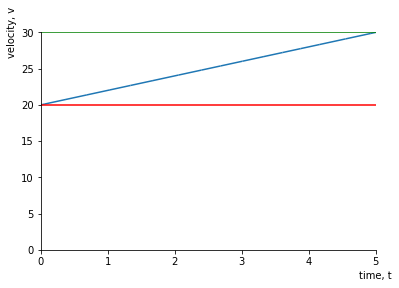

In [11]:
p = plot(u+a*x,u,u+a*t,xlim=(0,t),ylim=(0,u+a*t),xlabel="time, t",ylabel="velocity, v",show=False)
p[1].line_color='red'
p[2].line_color='green'
p.show();

In [ ]:
%load_ext tikzmagic

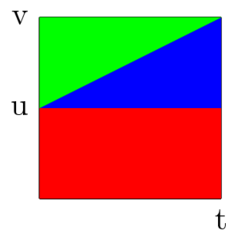

In [7]:
%%tikz

\draw (0,0) -- (2,0);
\draw (0,0) -- (0,2);
\node[anchor=east] at (0,1) (u) {u};
\node[anchor=east] at (0,2) (v) {v};
\node[anchor=north] at (2,0) (t) {t};
\draw (0,1) -- (2,2);
\draw (0,1) -- (2,1);
\draw (0,2) -- (2,2);
\draw (2,0) -- (2,2);
\fill[color=red] (0,0) -- (0,1) -- (2,1) -- (2,0);
\fill[color=blue] (0,1) -- (2,1) -- (2,2);
\fill[color=green] (0,1) -- (0,2) -- (2,2);

In this diagram, $s=\color{red}{Red}+\color{blue}{Blue}=\color{red}{ut}+\color{blue}{\frac{1}{2}(v-u)t}$

But $v-u=at$ so this becomes $s=ut+\frac{1}{2}at^2$

Alternatively, $s=vt-\color{green}{Green}=vt-\color{green}{\frac{1}{2}(v-u)t}$

Hence $s=vt-\frac{1}{2}at^2$

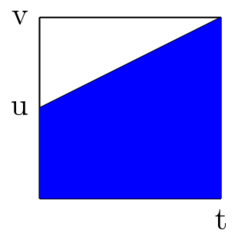

In [12]:
%%tikz
\draw (0,0) -- (2,0);
\draw (0,0) -- (0,2);
\node[anchor=east] at (0,1) (u) {u};
\node[anchor=east] at (0,2) (v) {v};
\node[anchor=north] at (2,0) (t) {t};
\draw (0,1) -- (2,2);
\draw (0,1) -- (2,1);
\draw (0,2) -- (2,2);
\draw (2,0) -- (2,2);
\fill[color=blue] (0,0) -- (0,1) -- (2,1) -- (2,0);
\fill[color=blue] (0,1) -- (2,1) -- (2,2);

A third possibility is $s=\color{blue}{Blue\,trapezium}=\dfrac{u+v}{2}t$

So far we have

$\begin{aligned}
v&=u+at\\
s&=\dfrac{u+v}{2}t\\
s&=ut+\frac{1}{2}at^2\\
s&=vt-\frac{1}{2}at^2
\end{aligned}$

Each of these has four of the five unknowns. There should be a fifth equation, one that doesn't involve $t$.

The easiest pair to eliminate $t$ from are $\begin{cases}v=u+at\\s=\dfrac{u+v}{2}t\end{cases}$

$\begin{cases}t=\dfrac{v-u}{a}\\\\t=\dfrac{2s}{u+v}\end{cases} \dfrac{v-u}{a}=\dfrac{2s}{u+v}\implies v^2-u^2=2as$

This is usually written $v^2=u^2+2as$

Finally then, we have five equations, each involving four of the variables

$\begin{aligned}
v&=u+at\\
s&=\dfrac{u+v}{2}t\\
s&=ut+\frac{1}{2}at^2\\
s&=vt-\frac{1}{2}at^2\\
v^2&=u^2+2as
\end{aligned}$

In [14]:
import numpy as np

## Random `suvat` question generator

In [15]:
u = np.random.choice([-3,-2,-1,1,2,3,4,5])
t = np.random.choice([1,2,2,3,4,5,8,12,15,20,30,45])
a = np.random.choice([-3,-2,-1,1,2,3,5,-9.8,10])
s = u*t+0.5*a*t**2
v = u+a*t
variables = {"u": u,
            "v": v,
            "a": a,
            "s": s,
            "t": t}
given = np.random.choice(list(variables.keys()),size=4,replace=False)
for variable in given[:-1]:
    print("{}={}".format(variable,variables[variable]))
print("Find {}".format(given[-1]))

t=2
s=-2.0
v=0.0
Find a
